## Eyas Shalhoub **1201681**  

# Data frame initialization

## Import the needed libriries for the project

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.mode.chained_assignment = None

## Dataset Description
This dataset presents information about pit stops in formula one races around the world.
A pit stop is when a team decides to change the tiers of a car, fix the car or serve a penalty.

This data set was taken from the site Kaggle by the creator Qpm:
https://www.kaggle.com/datasets/debashish311601/formula-1-official-data-19502022


Dictionary

| Column      | Data Type | Description                                           |
|-------------|-----------|-------------------------------------------------------|
| Stops       | Integer   | Number of pit stops made during the race(for a driver).            |
| No          | Integer   | Race number(Id).        |
| Driver      | String    | Name of the driver participating in the race. |
| Car         | String    | Name of the car driven by the driver.(Team)   |
| Lap         | Integer   | Lap number during the race which the stop had happened at.                           |
| Time        | Float     | Time taken to complete a pit stop.      |
| Total       | Float     | Total time in the pit for a driver in a single race.                        |
| Year        | Integer   | Year when the race occurred.                          |
| Grand Prix  | String    | Name of the Grand Prix event(Race).           |

## Loading Data
Unnessary columns are dropped.


In [61]:
df =pd.read_csv('pitstops.csv')

print(df['Detail'].unique())

df

['Pit-Stop-Summary']


,Stops,No,Driver,Car,Lap,Time of day,Time,Total,Year,Grand Prix,Detail,DriverCode
0,1,20,Erik Comas,Larrousse Ford,1,14:01:34,49.111000000000004,49.111,1994,Pacific,Pit-Stop-Summary,COM
1,1,3,Ukyo Katayama,Tyrrell Yamaha,17,14:20:46,28.482,28.482,1994,Pacific,Pit-Stop-Summary,KAT
2,1,7,Mika Hakkinen,McLaren Peugeot,18,14:22:35,43.745,43.745,1994,Pacific,Pit-Stop-Summary,HAK
3,1,0,Damon Hill,Williams Renault,18,14:23:00,21.991999999999997,21.992,1994,Pacific,Pit-Stop-Summary,HIL
4,1,24,Michele Alboreto,Minardi Ford,19,14:24:39,27.693,27.693,1994,Pacific,Pit-Stop-Summary,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...
20288,2,6,Nicholas Latifi,Williams Mercedes,38,18:02:50,25.174,47.597,2022,Abu Dhabi,Pit-Stop-Summary,LAT
20289,2,18,Lance Stroll,Aston Martin Aramco Mercedes,40,18:04:44,21.802,43.616,2022,Abu Dhabi,Pit-Stop-Summary,STR
20290,2,31,Esteban Ocon,Alpine Renault,41,18:06:09,21.734,43.629,2022,Abu Dhabi,Pit-Stop-Summary,OCO
20291,2,4,Lando Norris,McLaren Mercedes,42,18:07:36,21.559,43.793,2022,Abu Dhabi,Pit-Stop-Summary,NOR


Since the column 'Detail' has one value, it is not needed for our data set.<br>
The Column 'DriverCode' is equivelant to the column 'Driver', thus dropped.
Also the column 'Time of day' is irrelivant to our analysis.

In [62]:
df =df.drop(columns=['DriverCode','Detail','Time of day'])

## Data shape

In [63]:
print(f"The shape of the data set{df.shape}")

The shape of the data set(20293, 9)


## Proccess the time column
**PS**: Any data point with time longer than a minute is considered a retirement for the driver/car which is marked as `None` those data point are later droped.

In [64]:
def time_to_seconds(time_str):
    try:
        if not ':' in time_str :
          return float(time_str)
        else:
            return None
    except TypeError:
        return float(time_str)

df['Time'] = df['Time'].apply(time_to_seconds)
df['Time']

0        49.111
1        28.482
2        43.745
3        21.992
4        27.693
          ...  
20288    25.174
20289    21.802
20290    21.734
20291    21.559
20292    23.159
Name: Time, Length: 20293, dtype: float64

## Missing values


### Check for missing data in cells for each columns

In [65]:
print(df.isnull().sum())

Stops           0
No              0
Driver          0
Car             1
Lap             0
Time          588
Total           0
Year            0
Grand Prix      0
dtype: int64


### Delete data points with missing values

In [66]:
def checkforNan(df):
  new_data = df.dropna(axis = 0, how ='any')
  print(f"Original dataframe size: {len(df)}")
  print(f"New dataframe size: {len(new_data)}")

  if (len(new_data)<len(df)):# if a change was made replace the data frame
    df=new_data
  new_data=None
  return df
df=checkforNan(df)

Original dataframe size: 20293
New dataframe size: 19704


# Features analysis

## Nominal Vs Numerical

Nominal Features:
* Driver
* Car
* Grand Prix
* No (raceId)

Numerical Features:
* Stops
* Lap
* Time
* Total
* Year

## Ordinal Vs Categorical

Ordinal Features:
* Lap
* Year

Categorical Features:
* Driver
* Car
* Grand Prix
* No (RaceId)

## Numerical features analysis

In [67]:
print("Pit stop time describtion")
print(df['Time'].describe())
print("\nPit lap describtion")
print(df['Lap'].describe())

Pit stop time describtion
count    19704.000000
mean        26.546468
std          5.884417
min          8.757000
25%         22.645000
50%         25.145000
75%         29.468000
max         59.885000
Name: Time, dtype: float64

Pit lap describtion
count    19704.000000
mean        27.783293
std         14.320064
min          1.000000
25%         17.000000
50%         27.000000
75%         39.000000
max         78.000000
Name: Lap, dtype: float64


## Skweness Interpretation

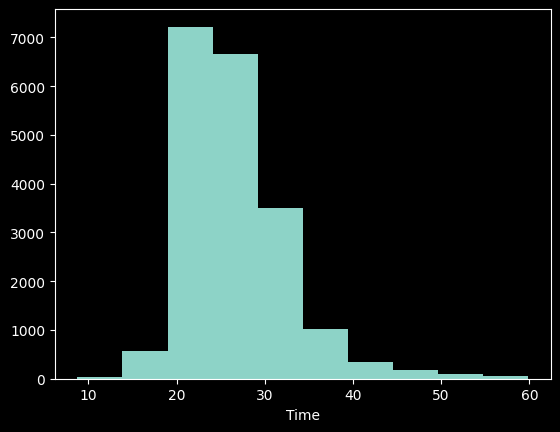

Skweness values for 'Time' is:1.5405



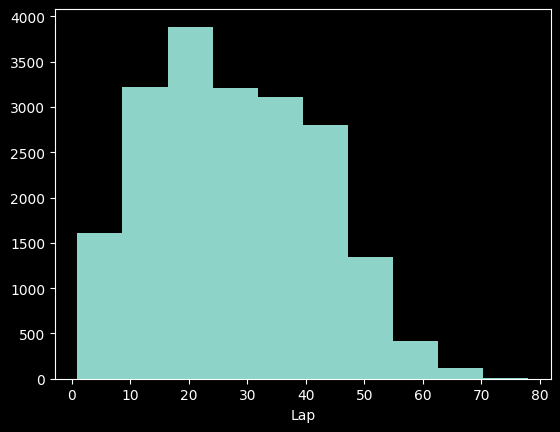

Skweness values for 'Lap' is:0.1924


In [68]:
plt.hist(df['Time'])
plt.xlabel('Time')
plt.show()
print(f"Skweness values for 'Time' is:{df['Time'].skew():.4f}\n")
plt.hist(df['Lap'])
plt.xlabel('Lap')
plt.show()
print(f"Skweness values for 'Lap' is:{df['Lap'].skew():.4f}")

The values of 'Time' is skewed to the right indicating that pitstop tend to be more quicker than it is slower.<br>
Meanwhile, The values of 'Lap' is also skewed positively to the right meaning that the majority of pitstops happens early in the races.

## Categorical features balance

Distribution of drivers:
Daniel Ricciardo     449
Toranosuke Takagi     36
Sakon Yamamoto        31
Romain Grosjean      303
Rio Haryanto          25
                    ... 
Gerhard Berger        91
Bertrand Gachot       10
Franck Montagny        8
Nyck De Vries          2
Jean Alesi           185
Name: Driver, Length: 161, dtype: int64
Number of unique drivers: 161


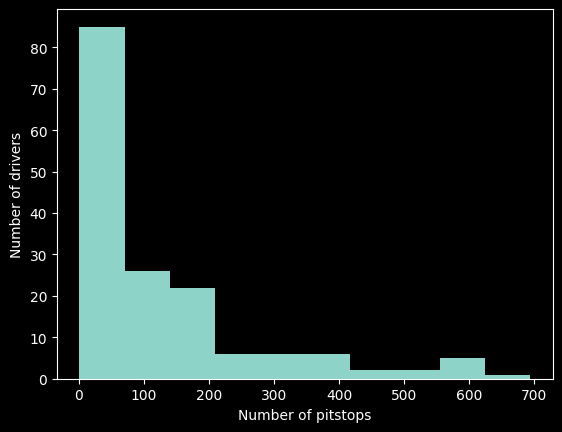


Distribution of cars:
Benetton Renault           218
Alpine Renault             198
AlphaTauri Honda           120
Benetton Ford               47
Red Bull Racing Renault    428
                          ... 
Sauber Ford                 88
Super Aguri Honda          132
Red Bull Renault           113
Jordan Hart                 33
Force India Mercedes       692
Name: Car, Length: 99, dtype: int64
Number of unique cars: 99


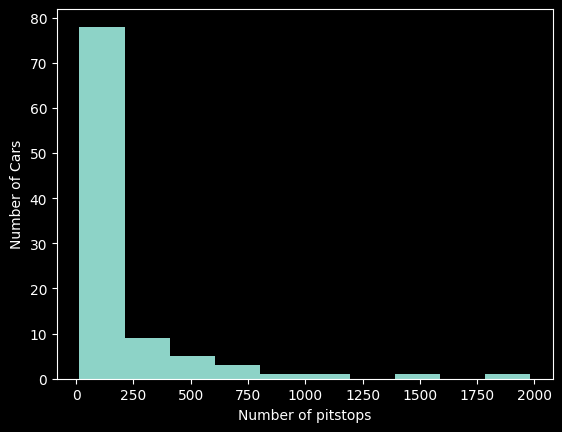

In [69]:
# Check the balance of the 'Driver' feature
driver_counts = df['Driver'].value_counts().sample(frac = 1)
print("Distribution of drivers:")
print(driver_counts)
print("Number of unique drivers:", len(driver_counts))
plt.hist(driver_counts)
plt.xlabel('Number of pitstops')
plt.ylabel('Number of drivers')
plt.show()
print()

# Check the balance of the 'Car' feature
car_counts = df['Car'].value_counts().sample(frac = 1)
print("Distribution of cars:")
print(car_counts)
print("Number of unique cars:", len(car_counts))
plt.hist(car_counts)
plt.xlabel('Number of pitstops')
plt.ylabel('Number of Cars')
plt.show()

As seen in both the histogram and the output series(`driver_counts,car_counts`), neither of the features 'Driver' nor 'Car' is balanced.

## Correlated features

### Potential correlation

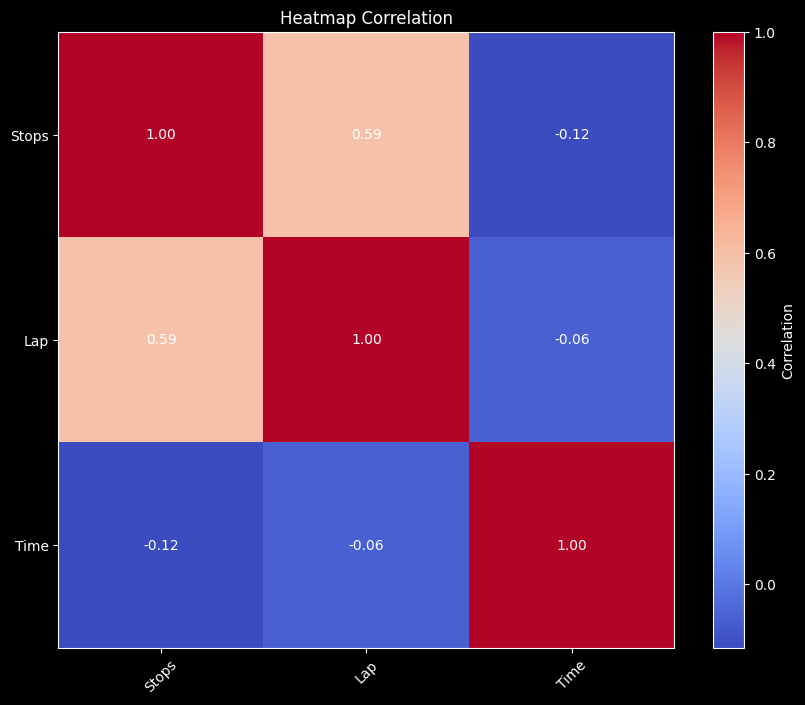

In [75]:
df['No']=df['No'].astype(str)
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')


plt.colorbar(label='Correlation')


plt.title('Heatmap Correlation')

plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='white')

plt.show()

In the correlation matrix for the dataframe, several correlations stand out. The most significant positive correlation exists between "Stops" and "Lap" variables, with a coefficient of approximately 0.59. This indicates that as the number of stops during a race increases, the number of laps completed also tends to rise, this is logical because every fixed number of “labs” theres one “Stop” so when the labs increase the stop number will also increase. Conversely, a notable negative correlation is observed between "Time" and "Year" variables, with a coefficient of around -0.41. This suggests that as the years progress, there is a noticeable decrease in the time needed for the car to finish the pit, due to FIA[1] decision to stop refueling cars and possibly indicating advancements in technology, efficiency, or strategy over time.

[1] Fia: The Fédération Internationale de l'Automobile is an association established on 20 June 1904 to represent the interests of motoring organisations and motor car users. It is the governing body for many auto racing events, including Formula One. The FIA also promotes road safety around the world. https://en.wikipedia.org/wiki/F%C3%A9d%C3%A9ration_Internationale_de_l'Automobile

### Record some race's data into a seprate data frame

In [71]:
race_name='Saudi Arabia'

race = df[df['Grand Prix']==race_name].reset_index()
race.drop(columns='index',inplace=True)
race.head()

,Stops,No,Driver,Car,Lap,Time,Total,Year,Grand Prix
0,1,18,Lance Stroll,Aston Martin Mercedes,9,27.165,27.165,2021,Saudi Arabia
1,1,63,George Russell,Williams Mercedes,9,20.519,20.519,2021,Saudi Arabia
2,1,44,Lewis Hamilton,Mercedes,10,20.580,20.580,2021,Saudi Arabia
3,1,77,Valtteri Bottas,Mercedes,10,21.668,21.668,2021,Saudi Arabia
4,1,16,Charles Leclerc,Ferrari,10,20.531,20.531,2021,Saudi Arabia


### Average pistop times thoughout the years

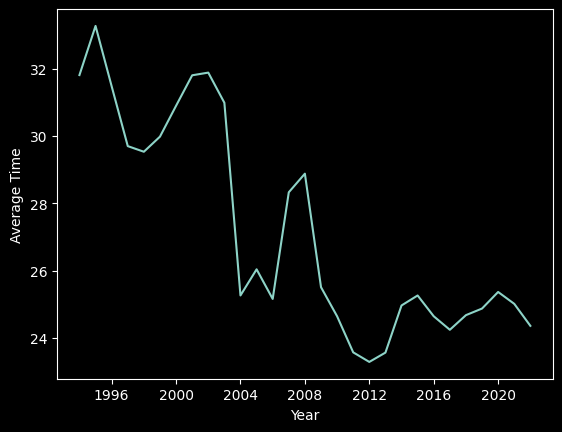

In [72]:
pitstop_data=df

pitstop_data['Year'] = pd.to_datetime(pitstop_data['Year'], format='%Y')
pitstop_data['Time'] = pd.to_numeric(pitstop_data['Time'], errors='coerce')
pitstop_grouped = pitstop_data.groupby(pitstop_data['Year'])['Time'].mean().reset_index()
pitstop_grouped = pitstop_grouped.rename(columns={'Time': 'Average'})
pitstop_grouped = pitstop_grouped.sort_values('Year')
plt.plot(pitstop_grouped['Year'],pitstop_grouped['Average'])
plt.xlabel('Year')
plt.ylabel('Average Time')
plt.show()

This histogram plot proofs our heat map's analysis right, as the time passes the 'Time' decreases which is a negative correlation.<br>
**PS**: In the year 2008, the FIA decided to bring back car refueling which was cancel later, this explains the spike in the graph.

### Average pitstop for teams

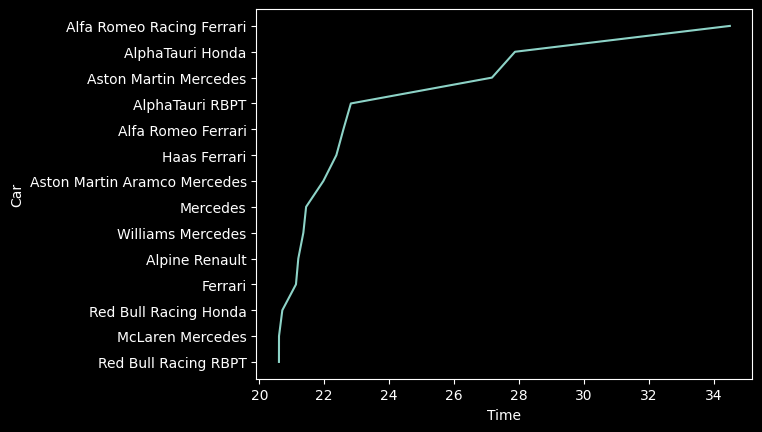

In [76]:
pitstop_data=race

pitstop_data['Time'] = pd.to_numeric(pitstop_data['Time'], errors='coerce')

pitstop_grouped = pitstop_data.groupby(pitstop_data['Car'])['Time'].mean().reset_index()

pitstop_grouped = pitstop_grouped.rename(columns={'Time': 'Average'})

pitstop_grouped = pitstop_grouped.sort_values('Average')

plt.plot(pitstop_grouped['Average'],pitstop_grouped['Car'])
plt.xlabel('Time')
plt.ylabel('Car')
plt.show()

## Possible Index feature


In [74]:
df.nunique() == len(df)

Stops         False
No            False
Driver        False
Car           False
Lap           False
Time          False
Total         False
Year          False
Grand Prix    False
dtype: bool

No, there cant be a single feature that acts as an index for the dataset, non of the columns are unique and can be used as an identifier. Meanwhile a set of features can be used as index the best practice is to use the features {No(raceId),Driver,Stop} as no driver will do any duplicate 'Stop' in a single race.